In [85]:
import pandas as pd
import numpy as np

#####Read json_file to dataframe:

In [86]:
df = pd.read_json("dataset.json")
df

browser          os locale  user_id gender               location  \
0      Firefox      Ubuntu  ru_RU      105      m            USA/Chicago   
1      Firefox   Windows 8  pl-PL       11      m            USA/Chicago   
2       Chrome      Ubuntu  zh-CN       17      m    Singapore/Singapore   
3       Chrome  Windows 10  pt-BR      134      f       Australia/Sydney   
4      Firefox  Windows 10  en-SG       92      f            USA/Chicago   
...        ...         ...    ...      ...    ...                    ...   
79995   Chrome  Windows 10  pt-PT      178      m   New Zealand/Auckland   
79996   Safari       MacOS  it-IT       32      m  Netherlands/Amsterdam   
79997  Firefox      Ubuntu  ru_RU        0      m            USA/Chicago   
79998  Firefox  Windows 10  ru_RU       56      m           France/Paris   
79999  Firefox  Windows 10  pt-BR      113      f   New Zealand/Auckland   

                                                   sites      time       date  
0      [{'site': 'mail.google.com', 'length': 50}, {'...  09:03:00 2017-01-08  
1      [{'site': 'meduza.org', 'length': 40}, {'site'...  13:57:00 2016-10-05  
2      [{'site': 'facebook.net', 'length': 74}, {'sit...  02:06:00 2017-03-28  
3      [{'site': 'verisign.com', 'length': 111}, {'si...  21:49:00 2017-06-25  
4      [{'site': 'live.com', 'length': 79}, {'site': ...  00:05:00 2016-02-10  
...                                                  ...       ...        ...  
79995  [{'site': 'vk.com', 'length': 126}, {'site': '...  06:02:00 2016-12-30  
79996  [{'site': 'slack.com', 'length': 74}, {'site':...  10:27:00 2017-01-27  
79997  [{'site': 'vk.com', 'length': 44}, {'site': 's...  17:55:00 2017-03-13  
79998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...  14:17:00 2016-12-06  
79999  [{'site': 'baidu.com', 'length': 60}, {'site':...  06:57:00 2016-02-18  

[80000 rows x 9 columns]

Data types, check if there are some null values in the dataset:

In [87]:
df.isnull().values.any()

False

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   80000 non-null  object        
 1   os        80000 non-null  object        
 2   locale    80000 non-null  object        
 3   user_id   80000 non-null  int64         
 4   gender    80000 non-null  object        
 5   location  80000 non-null  object        
 6   sites     80000 non-null  object        
 7   time      80000 non-null  object        
 8   date      80000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 5.5+ MB




*   dataset has one column containing integer values, second datetime and rest are objects
*   No variable column has null/missing values.



We have 200 unique user_ids:

In [89]:
len(df.user_id.unique())

200

Count how many observations describe detecting user_id=0

In [90]:
df.loc[df['user_id'] == 0]

browser          os locale  user_id gender        location  \
77     Firefox  Windows 10  ru_RU        0      m    France/Paris   
198     Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
200    Firefox  Windows 10  ru_RU        0      m  Canada/Toronto   
354    Firefox  Windows 10  ru_RU        0      m     USA/Chicago   
710    Firefox      Ubuntu  ru_RU        0      m    France/Paris   
...        ...         ...    ...      ...    ...             ...   
79578   Chrome  Windows 10  ru_RU        0      m    France/Paris   
79771   Chrome      Ubuntu  ru_RU        0      m  Canada/Toronto   
79918  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   
79982   Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
79997  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   

                                                   sites      time       date  
77     [{'site': 'mail.google.com', 'length': 86}, {'...  10:13:00 2016-04-30  
198    [{'site': 'youtube.com', 'length': 71}, {'site...  18:26:00 2016-11-22  
200    [{'site': 'mail.google.com', 'length': 140}, {...  16:57:00 2017-08-05  
354    [{'site': 'mail.google.com', 'length': 207}, {...  03:42:00 2017-02-19  
710    [{'site': 'vk.com', 'length': 56}, {'site': 's...  19:15:00 2016-04-08  
...                                                  ...       ...        ...  
79578  [{'site': 'vk.com', 'length': 82}, {'site': 'm...  19:44:00 2016-06-10  
79771  [{'site': 'mail.google.com', 'length': 124}, {...  01:53:00 2017-08-16  
79918  [{'site': 'mail.google.com', 'length': 80}, {'...  17:46:00 2016-12-12  
79982  [{'site': 'vk.com', 'length': 109}, {'site': '...  02:35:00 2017-05-02  
79997  [{'site': 'vk.com', 'length': 44}, {'site': 's...  17:55:00 2017-03-13  

[400 rows x 9 columns]

We have only 400 observations which are labeled as user_id=0. Which means that we are dealing with umbalanced dataset becaudse the ratio is 400 : 79600. So we can think of  restoring balance on the training set by undersampling the large class or by oversampling the small class, to prevent bias from arising in the first place.

Function that gets all website names:

In [91]:
def get_sites_names(df):
  names = set()
  for i in df.index:
    for site in df.iloc[i]["sites"]:
      if site["site"] not in names:
        names.add(site["site"])
  return names


In [92]:
len(get_sites_names(df))

11131

Check how does user_id=0 look like, so we can choose only significant websites and other charasterics that diffent him from others:

In [93]:
pred_user = df.loc[df['user_id'] == 0]
print(pred_user["browser"].unique())
print(pred_user["os"].unique())
print(pred_user["locale"].unique())
print(pred_user["gender"].unique())
print(pred_user["location"].unique())

['Firefox' 'Chrome']
['Windows 10' 'Ubuntu']
['ru_RU']
['m']
['France/Paris' 'USA/Chicago' 'Canada/Toronto']


Get all users that have similiar characteristics:

In [94]:
# df.loc[(df['browser'] == "Firefox" | df['browser'] == "Chrome" ) & (df['os'] == "Ubuntu")]

df_filtered = df.query('(browser == "Firefox" | browser == "Chrome") & (os == "Ubuntu" | os == "Windows 10") & locale == "ru_RU" & gender == "m" & (location == "France/Paris" | location == "USA/Chicago" | location == "Canada/Toronto")')
df_filtered

browser          os locale  user_id gender      location  \
0      Firefox      Ubuntu  ru_RU      105      m   USA/Chicago   
77     Firefox  Windows 10  ru_RU        0      m  France/Paris   
78      Chrome      Ubuntu  ru_RU       82      m  France/Paris   
90      Chrome      Ubuntu  ru_RU       15      m  France/Paris   
166     Chrome      Ubuntu  ru_RU       82      m   USA/Chicago   
...        ...         ...    ...      ...    ...           ...   
79918  Firefox      Ubuntu  ru_RU        0      m   USA/Chicago   
79977   Chrome  Windows 10  ru_RU      192      m  France/Paris   
79982   Chrome  Windows 10  ru_RU        0      m   USA/Chicago   
79997  Firefox      Ubuntu  ru_RU        0      m   USA/Chicago   
79998  Firefox  Windows 10  ru_RU       56      m  France/Paris   

                                                   sites      time       date  
0      [{'site': 'mail.google.com', 'length': 50}, {'...  09:03:00 2017-01-08  
77     [{'site': 'mail.google.com', 'length': 86}, {'...  10:13:00 2016-04-30  
78     [{'site': 'vk.com', 'length': 161}, {'site': '...  14:25:00 2016-06-18  
90     [{'site': 'lenta.ru', 'length': 279}, {'site':...  19:14:00 2017-06-23  
166    [{'site': 'mail.google.com', 'length': 59}, {'...  21:22:00 2017-06-16  
...                                                  ...       ...        ...  
79918  [{'site': 'mail.google.com', 'length': 80}, {'...  17:46:00 2016-12-12  
79977  [{'site': 'vk.com', 'length': 51}, {'site': 'y...  00:28:00 2016-08-13  
79982  [{'site': 'vk.com', 'length': 109}, {'site': '...  02:35:00 2017-05-02  
79997  [{'site': 'vk.com', 'length': 44}, {'site': 's...  17:55:00 2017-03-13  
79998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...  14:17:00 2016-12-06  

[3360 rows x 9 columns]

Check how many users are similiar to user_id=0

In [95]:
df_filtered["user_id"].unique()

array([105,   0,  82,  15, 192, 181, 111,  56,  69])

Check how many unigue sites there are in fitered dataset;

In [96]:
len(get_sites_names(df_filtered.reset_index(drop=True)))

6656

6665 is still a lot of websites, thats why we will take only most visited for each 'similiar' user_id=0:

In [97]:
import operator
for u in df_filtered["user_id"].unique():
  vis_sites = {}
  for site in df[df["user_id"] == u]["sites"]:
      for s in site:
          if s["site"] not in vis_sites:
              vis_sites[s["site"]] = 0
          vis_sites[s["site"]] += s["length"]
  print(f"USER %u")
  print(vis_sites)
  print(sorted(vis_sites.items(), key=operator.itemgetter(1),reverse=True))

USER %u
{'mail.google.com': 45865, 'toptal.com': 45136, 'slack.com': 45376, 'lenta.ru': 44793, 'youtube.com': 45726, 'chitay-knigi.ru': 108, 'lekari-online.cz': 174, 'newegg.com': 114, 'cyclismo.org': 75, 'speed-burger.com': 110, 'proceau.net': 280, 'brealtime.com': 126, 'vipshop.com': 455, 'novethic.fr': 114, 'thecoveteur.com': 82, 'cloudify.cc': 97, 'email-match.com': 55, 'hdmedia.fr': 198, 'misterjob.com': 59, 'allopneus.com': 81, 'sinastorage.com': 154, 'shengejing.com': 73, 'internetactu.net': 47, 'tubixe.com': 185, 'plaintxt.org': 166, 'viaempresa.cat': 88, 'levillagedemusher.com': 441, 'rapidpush.net': 131, 'ladmedia.fr': 365, 'cakemania.it': 43, 'lesseigneurs.fr': 287, 'talkingtree.com': 87, 'acrobat.com': 61, 'funny-pictures-blog.com': 74, 'ev.mu': 74, 'artima.com': 318, 'paris.fr': 193, 'eclipsezone.com': 261, 'webmonkey.com': 202, 'venus.com': 50, 'staragora.com': 87, 'eric-pidoux.com': 240, 'travel-agency.travel': 44, 'newswise.com': 335, 'one.com': 114, 'design3.com': 47, 

We create columns with following website_names and extra column with summarize time spent on other websites not from the list:

In [98]:
sites = ["mail.google.com", "lenta.ru", "vk.com", "youtube.com", "slack.com"]


In [99]:
other_sites = [0] * df.shape[0]
i = 0
for s in sites:
  length_on_site = []
  for u in df.index:
    sum = 0
    for x in df.iloc[u]["sites"]:
      if x["site"] == s:
        sum += x["length"]  
      elif x["site"] not in sites and i == 0:
        other_sites[u] += x["length"]

    length_on_site.append(sum) 
  i += 1  
  df[s] = length_on_site
df["other"] = other_sites
df.head()

browser          os locale  user_id gender             location  \
0  Firefox      Ubuntu  ru_RU      105      m          USA/Chicago   
1  Firefox   Windows 8  pl-PL       11      m          USA/Chicago   
2   Chrome      Ubuntu  zh-CN       17      m  Singapore/Singapore   
3   Chrome  Windows 10  pt-BR      134      f     Australia/Sydney   
4  Firefox  Windows 10  en-SG       92      f          USA/Chicago   

                                               sites      time       date  \
0  [{'site': 'mail.google.com', 'length': 50}, {'...  09:03:00 2017-01-08   
1  [{'site': 'meduza.org', 'length': 40}, {'site'...  13:57:00 2016-10-05   
2  [{'site': 'facebook.net', 'length': 74}, {'sit...  02:06:00 2017-03-28   
3  [{'site': 'verisign.com', 'length': 111}, {'si...  21:49:00 2017-06-25   
4  [{'site': 'live.com', 'length': 79}, {'site': ...  00:05:00 2016-02-10   

   mail.google.com  lenta.ru  vk.com  youtube.com  slack.com  other  
0               50        59       0           67         65    240  
1                0         0       0          202          0    874  
2                0         0       0          109          0   1171  
3                0         0       0            0        191   1132  
4                0         0       0            0          0    224

Also interesting influence can have the order of visited websites:

In [100]:
sites += ["other", "none"]

In [101]:
import json
# load data using Python JSON module
with open('dataset.json','r') as f:
    data = json.loads(f.read())
df_nested_list = pd.json_normalize(df['sites'])
df_nested_list

0   \
0      {'site': 'mail.google.com', 'length': 50}   
1           {'site': 'meduza.org', 'length': 40}   
2         {'site': 'facebook.net', 'length': 74}   
3        {'site': 'verisign.com', 'length': 111}   
4             {'site': 'live.com', 'length': 79}   
...                                          ...   
79995          {'site': 'vk.com', 'length': 126}   
79996        {'site': 'slack.com', 'length': 74}   
79997           {'site': 'vk.com', 'length': 44}   
79998         {'site': 'lenta.ru', 'length': 82}   
79999        {'site': 'baidu.com', 'length': 60}   

                                              1   \
0          {'site': 'toptal.com', 'length': 132}   
1           {'site': 'disqus.com', 'length': 61}   
2            {'site': 'live.com', 'length': 246}   
3         {'site': 'booking.com', 'length': 112}   
4      {'site': 'livraddict.com', 'length': 145}   
...                                          ...   
79995        {'site': 'slack.com', 'length': 63}   
79996      {'site': 'youtube.com', 'length': 43}   
79997        {'site': 'slack.com', 'length': 71}   
79998      {'site': 'toptal.com', 'length': 103}   
79999      {'site': 'oracle.com', 'length': 118}   

                                                  2   \
0                {'site': 'slack.com', 'length': 65}   
1             {'site': 'youtube.com', 'length': 202}   
2             {'site': 'youtube.com', 'length': 109}   
3      {'site': 'openclassrooms.com', 'length': 301}   
4                                               None   
...                                              ...   
79995          {'site': 'youtube.com', 'length': 46}   
79996               {'site': 'vk.com', 'length': 70}   
79997      {'site': 'mail.google.com', 'length': 54}   
79998              {'site': 'vk.com', 'length': 133}   
79999        {'site': 'verisign.com', 'length': 495}   

                                               3   \
0              {'site': 'lenta.ru', 'length': 59}   
1        {'site': 'wikipedia.org', 'length': 127}   
2             {'site': 'baidu.com', 'length': 95}   
3            {'site': 'slack.com', 'length': 191}   
4                                            None   
...                                           ...   
79995       {'site': 'dartfish.tv', 'length': 72}   
79996          {'site': 'mmhp.net', 'length': 80}   
79997        {'site': 'plexop.net', 'length': 88}   
79998  {'site': 'mail.google.com', 'length': 127}   
79999       {'site': 'google.com', 'length': 145}   

                                                4   \
0            {'site': 'youtube.com', 'length': 67}   
1       {'site': 'bulgarie-bg.com', 'length': 141}   
2      {'site': 'digitaltrends.com', 'length': 74}   
3           {'site': 'css3menu.com', 'length': 40}   
4                                             None   
...                                            ...   
79995         {'site': 'issuu.com', 'length': 202}   
79996                                         None   
79997       {'site': 'galaxys5.fr', 'length': 276}   
79998       {'site': 'youtube.com', 'length': 251}   
79999         {'site': 'gecif.net', 'length': 197}   

                                                      5   \
0             {'site': 'chitay-knigi.ru', 'length': 108}   
1                    {'site': 'lijit.com', 'length': 79}   
2      {'site': 'womensinfluencernetwork.com', 'lengt...   
3                 {'site': 'mozilla.org', 'length': 250}   
4                                                   None   
...                                                  ...   
79995                                               None   
79996                                               None   
79997               {'site': 'csusb.edu', 'length': 165}   
79998                                               None   
79999          {'site': 'engineyard.com', 'length': 273}   

                                            6   \
0                                         None   
1             {'

Create new columns with order of visited website(we looking only at most popular, if not in the list we assume it as 'other'):

In [102]:
for o in range(df_nested_list.shape[1]):
  order = []
  for u in range(df_nested_list.shape[0]):
    if df_nested_list.iloc[u][o] == None:
      order.append(sites.index("none"))
    elif df_nested_list.iloc[u][o]["site"] not in sites:
      order.append(sites.index("other"))
    else: 
      order.append(sites.index(df_nested_list.iloc[u][o]["site"]))
  df['order' + str(o)] = order


Now we want to extract day of week, day, month, year  and hourfor our analysis

In [103]:
df['day'] = df["date"].dt.day
df['month'] = df["date"].dt.month
df['year'] = df["date"].dt.year
df['day_of_week'] = df["date"].dt.dayofweek
df['time_as_float'] = pd.to_datetime(df["time"]).dt.hour + pd.to_datetime(df["time"]).dt.minute/60
# Delete not useful columns from the dataframe
df = df.drop(["sites", "time", "date"], axis=1)
df

browser          os locale  user_id gender               location  \
0      Firefox      Ubuntu  ru_RU      105      m            USA/Chicago   
1      Firefox   Windows 8  pl-PL       11      m            USA/Chicago   
2       Chrome      Ubuntu  zh-CN       17      m    Singapore/Singapore   
3       Chrome  Windows 10  pt-BR      134      f       Australia/Sydney   
4      Firefox  Windows 10  en-SG       92      f            USA/Chicago   
...        ...         ...    ...      ...    ...                    ...   
79995   Chrome  Windows 10  pt-PT      178      m   New Zealand/Auckland   
79996   Safari       MacOS  it-IT       32      m  Netherlands/Amsterdam   
79997  Firefox      Ubuntu  ru_RU        0      m            USA/Chicago   
79998  Firefox  Windows 10  ru_RU       56      m           France/Paris   
79999  Firefox  Windows 10  pt-BR      113      f   New Zealand/Auckland   

       mail.google.com  lenta.ru  vk.com  youtube.com  slack.com  other  \
0                   50        59       0           67         65    240   
1                    0         0       0          202          0    874   
2                    0         0       0          109          0   1171   
3                    0         0       0            0        191   1132   
4                    0         0       0            0          0    224   
...                ...       ...     ...          ...        ...    ...   
79995                0         0     126           46         63    274   
79996                0         0      70           43         74     80   
79997               54         0      44            0         71    529   
79998              127        82     133          251          0    103   
79999                0         0       0            0          0   1597   

       order0  order1  order2  order3  order4  order5  order6  order7  order8  \
0           0       5       4       1       3       5       6       6       6   
1           5       5       3       5       5       5       5       5       5   
2           5       5       3       5       5       5       5       6       6   
3           5       5       5       4       5       5       5       5       5   
4           5       5       6       6       6       6       6       6       6   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
79995       2       4       3       5       5       6       6       6       6   
79996       4       3       2       5       6       6       6       6       6   
79997       2       4       0       5       5       5       6       6       6   
79998       1       5       2       0       3       6       6       6       6   
79999       5       5       5       5       5       5       5       5       6   

       order9  order10  order11  order12  day  month  year  day_of_week  \
0           6        6        6        6    8      1  2017            6   
1           6        6        6        6    5     10  2016            2   
2           6        6        6        6   28      3  2017            1   
3           6        6        6        6   25      6  2017            6   
4           6        6        6        6   10      2  2016            2   
...       ...      ...      ...      ...  ...    ...   ...          ...   
79995       6        6        6        6   30     12  2016            4   
79996       6        6        6        6   27      1  2017            4   
79997       6        6        6        6   13      3  2017            0   
79998       6        6        6        6    6     12  2016            1   
79999       6        6        6        6   18      2  2016            3   

       time_as_float  
0           9.050000  
1          13.950000  
2           2.100000  
3          21.816667  
4           0.083333  
...              ...  
79995       6.033333  
79996      10.450000  
79997      17.916667  
79998      14.283333  
79999       6.950000  

[80000 rows x 30 columns]

For classification problem we have to create binary column with our target - 0/1. 
And we will change the type of features for the porpuse of implementing DecisionTreeClassifier.

In [104]:
df["target"] = df["user_id"].apply(lambda x: 1 if x==0 else 0)

# Concatenate the dummies to original dataframe
df = pd.concat([df, pd.get_dummies(df.gender), pd.get_dummies(df.browser), pd.get_dummies(df.os), pd.get_dummies(df.locale), pd.get_dummies(df.location)], axis='columns')
df = df.drop(["browser", "os", "locale", "user_id"], axis=1)
df.head()


gender             location  mail.google.com  lenta.ru  vk.com  youtube.com  \
0      m          USA/Chicago               50        59       0           67   
1      m          USA/Chicago                0         0       0          202   
2      m  Singapore/Singapore                0         0       0          109   
3      f     Australia/Sydney                0         0       0            0   
4      f          USA/Chicago                0         0       0            0   

   slack.com  other  order0  order1  order2  order3  order4  order5  order6  \
0         65    240       0       5       4       1       3       5       6   
1          0    874       5       5       3       5       5       5       5   
2          0   1171       5       5       3       5       5       5       5   
3        191   1132       5       5       5       4       5       5       5   
4          0    224       5       5       6       6       6       6       6   

   order7  order8  order9  order10  order11  order12  day  month  year  \
0       6       6       6        6        6        6    8      1  2017   
1       5       5       6        6        6        6    5     10  2016   
2       6       6       6        6        6        6   28      3  2017   
3       5       5       6        6        6        6   25      6  2017   
4       6       6       6        6        6        6   10      2  2016   

   day_of_week  time_as_float  target  f  m  Chrome  Firefox  \
0            6       9.050000       0  0  1       0        1   
1            2      13.950000       0  0  1       0        1   
2            1       2.100000       0  0  1       1        0   
3            6      21.816667       0  1  0       1        0   
4            2       0.083333       0  1  0       0        1   

   Internet Explorer  Safari  Debian  MacOS  Ubuntu  Windows 10  Windows 7  \
0                  0       0       0      0       1           0          0   
1                  0       0       0      0       0           0          0   
2                  0       0       0      0       1           0          0   
3                  0       0       0      0       0           1          0   
4                  0       0       0      0       0           1          0   

   Windows 8  bg-BG  de-DE  en-AU  en-CA  en-GB  en-NZ  en-SG  en-US  es-MX  \
0          0      0      0      0      0      0      0      0      0      0   
1          1      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      1      0      0   

   fr-FR  it-IT  ja-JP  nl-NL  pl-PL  pt-BR  pt-PT  ro-RO  ru-RU  ru_RU  \
0      0      0      0      0      0      0      0      0      0      1   
1      0      0      0      0      1      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      1      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   uk-UA  ur-PK  vi-VN  wo-SN  xh-ZA  zh-CN  Australia/Sydney  \
0      0      0      0      0      0      0                 0   
1      0      0      0      0      0      0                 0   
2      0      0      0      0      0      1                 0   
3      0      0      0      0      0      0                 1   
4      0      0      0      0      0      0                 0   

   Brazil/Rio de Janeiro  Canada/Toronto  Canada/Vancouver  China/Shanghai  \
0                      0               0                 0               0   
1                      0               0                 0               0   
2                      0               0                 0               0   
3                      0               0                 0               0   
4                      0          

From before we know that user_id = 0 has those characteristics:

['Firefox' 'Chrome']
['Windows 10' 'Ubuntu']
['ru_RU']
['m']
['France/Paris' 'USA/Chicago' 'Canada/Toronto']

Thats why we get rid of another columns:

In [105]:
df.columns

Index(['gender', 'location', 'mail.google.com', 'lenta.ru', 'vk.com',
       'youtube.com', 'slack.com', 'other', 'order0', 'order1', 'order2',
       'order3', 'order4', 'order5', 'order6', 'order7', 'order8', 'order9',
       'order10', 'order11', 'order12', 'day', 'month', 'year', 'day_of_week',
       'time_as_float', 'target', 'f', 'm', 'Chrome', 'Firefox',
       'Internet Explorer', 'Safari', 'Debian', 'MacOS', 'Ubuntu',
       'Windows 10', 'Windows 7', 'Windows 8', 'bg-BG', 'de-DE', 'en-AU',
       'en-CA', 'en-GB', 'en-NZ', 'en-SG', 'en-US', 'es-MX', 'fr-FR', 'it-IT',
       'ja-JP', 'nl-NL', 'pl-PL', 'pt-BR', 'pt-PT', 'ro-RO', 'ru-RU', 'ru_RU',
       'uk-UA', 'ur-PK', 'vi-VN', 'wo-SN', 'xh-ZA', 'zh-CN',
       'Australia/Sydney', 'Brazil/Rio de Janeiro', 'Canada/Toronto',
       'Canada/Vancouver', 'China/Shanghai', 'France/Paris', 'Germany/Berlin',
       'India/Delhi', 'Italy/Rome', 'Japan/Tokyo', 'Malaysia/Kuala Lumpur',
       'Netherlands/Amsterdam', 'New Zealand/Auckl

In [107]:
pd.set_option('display.max_columns', None)
df = df.drop(["Windows 7", "Windows 8", "Internet Explorer",	"Safari",	"Debian", "MacOS",'bg-BG', 'de-DE', 'en-AU', 'en-CA', 'en-GB', 'en-NZ',
       'en-SG', 'en-US', 'es-MX', 'fr-FR', 'it-IT', 'ja-JP', 'nl-NL', 'pl-PL',
       'pt-BR', 'pt-PT', 'ro-RO', 'ru-RU', 'uk-UA', 'ur-PK', 'vi-VN',
       'wo-SN', 'xh-ZA', 'zh-CN','Australia/Sydney', 'Brazil/Rio de Janeiro',
       'Canada/Vancouver', 'China/Shanghai', 
       'Germany/Berlin', 'India/Delhi', 'Italy/Rome', 'Japan/Tokyo',
       'Malaysia/Kuala Lumpur', 'Netherlands/Amsterdam',
       'New Zealand/Auckland', 'Russia/Moscow', 'Singapore/Singapore',
       'Spain/Madrid', 'UK/London', 'USA/Miami', 'USA/New York',
       'USA/San Francisco', "location", "gender", "f"], axis=1)
df.columns

Index(['mail.google.com', 'lenta.ru', 'vk.com', 'youtube.com', 'slack.com',
       'other', 'order0', 'order1', 'order2', 'order3', 'order4', 'order5',
       'order6', 'order7', 'order8', 'order9', 'order10', 'order11', 'order12',
       'day', 'month', 'year', 'day_of_week', 'time_as_float', 'target', 'm',
       'Chrome', 'Firefox', 'Ubuntu', 'Windows 10', 'ru_RU', 'Canada/Toronto',
       'France/Paris', 'USA/Chicago'],
      dtype='object')

## Fitting the model:

Like we said before, we are dealing with imbalanced data. First, we don't need to take all observations into account, that's why we will take only those that are similiar to user_id=0:

In [109]:
data = df.iloc[df_filtered.index]

In [25]:
data

mail.google.com  lenta.ru  vk.com  youtube.com  slack.com  other  \
0                   50        59       0           67         65    240   
77                  86       215     158          161         58    499   
78                  46        41     161           43        156    592   
90                  99       279      85           82         62    306   
166                 59        62     191          123         88   1212   
...                ...       ...     ...          ...        ...    ...   
79918               80        75     151           52        415    157   
79977                0         0      51           54         45    537   
79982              543       214     109           58        146    117   
79997               54         0      44            0         71    529   
79998              127        82     133          251          0    103   

       order0  order1  order2  order3  order4  order5  order6  order7  order8  \
0           0       5       4       1       3       5       6       6       6   
77          0       2       1       4       3       5       5       5       5   
78          2       0       5       1       5       4       5       5       5   
90          1       5       0       2       3       5       4       5       5   
166         0       2       1       5       5       4       5       5       3   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
79918       0       2       5       4       1       3       6       6       6   
79977       2       3       4       5       5       5       5       5       6   
79982       2       0       5       1       4       5       3       6       6   
79997       2       4       0       5       5       5       6       6       6   
79998       1       5       2       0       3       6       6       6       6   

       order9  order10  order11  order12  day  month  year  day_of_week  \
0           6        6        6        6    8      1  2017            6   
77          5        6        6        6   30      4  2016            5   
78          3        6        6        6   18      6  2016            5   
90          6        6        6        6   23      6  2017            4   
166         5        5        6        6   16      6  2017            4   
...       ...      ...      ...      ...  ...    ...   ...          ...   
79918       6        6        6        6   12     12  2016            0   
79977       6        6        6        6   13      8  2016            5   
79982       6        6        6        6    2      5  2017            1   
79997       6        6        6        6   13      3  2017            0   
79998       6        6        6        6    6     12  2016            1   

       time_as_float  target  m  Chrome  Firefox  Ubuntu  Windows 10  ru_RU  \
0           9.050000       0  1       0        1       1           0      1   
77         10.216667       1  1       0        1       0           1      1   
78         14.416667       0  1       1        0       1           0      1   
90         19.233333       0  1       1        0       1           0      1   
166        21.366667       0  1       1        0       1           0      1   
...              ...     ... ..     ...      ...     ...         ...    ...   
79918      17.766667       1  1       0        1       1           0      1   
79977       0.466667       0  1       1        0       0           1      1   
79982       2.583333       1  1       1        0       0           1      1   
79997      17.916667       1  1       0        1       1           0      1   
79998      14.283333       0  1       0        1       0           1      1   

       Canada/Toronto  France/Paris  USA/Chicago  
0                   0             0            1  
77                  0             1            0  
78                  0             1            0  
90                  0             1            0  
166                 0       

Check the propotions of classes:

Class 0: 2960
Class 1: 400
Proportion: 7.4 : 1


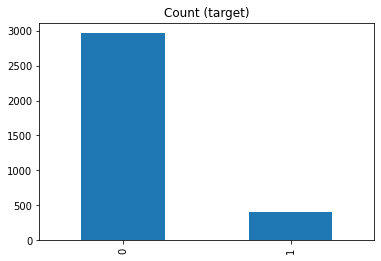

In [26]:
target_count = data.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### We can combine  Random Oversampling and Undersampling to deal with unbalanced data. This can result in improved overall performance compared to performing one or the other techniques in isolation:

In [27]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
X, y = data.loc[:, data.columns != "target"], data.target


In [142]:
import collections
print('Original dataset shape %s' % collections.Counter(y))

Original dataset shape Counter({0: 2960, 1: 400})


In [143]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = over.fit_resample(X, y)

import collections
print('Oversamplling on the dataset shape %s' % collections.Counter(y))

Oversamplling on the dataset shape Counter({0: 2960, 1: 1480})


In [144]:
from imblearn.under_sampling import RandomUnderSampler

# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.7)
# fit and apply the transform
X, y = under.fit_resample(X, y)



import collections
print('Undersampling on the dataset shape %s' % collections.Counter(y))

Undersampling on the dataset shape Counter({0: 2114, 1: 1480})


### Split data set into train and test sets:


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)


Now that the data is totally prepared, and we want to initiate classifier but first lets find best hyperparameters for DecisionTreeClassifier using gridsearchcv. 



In [ ]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
param_dict = {"criterion": ["gini", "entropy"],
              "max_depth": range(1,10),
              "min_samples_split": range(1,5),
              "min_samples_leaf": range(1,10)}

scorer = make_scorer(f1_score, average="weighted")
grid = GridSearchCV(tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1, scoring="f1")
grid.fit(X_train, y_train)

In [123]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

 The criterion chosen for this classifier is gini, max_depth is set to 9 and min_samples_split to 3 . There are a lot of features in out data, thats why we will check Feature importance, that can be used to improve a predictive model:

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00509
Feature: 2, Score: 0.00088
Feature: 3, Score: 0.01587
Feature: 4, Score: 0.00033
Feature: 5, Score: 0.01216
Feature: 6, Score: 0.22155
Feature: 7, Score: 0.01508
Feature: 8, Score: 0.00147
Feature: 9, Score: 0.01754
Feature: 10, Score: 0.00365
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00145
Feature: 14, Score: 0.00276
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00463
Feature: 20, Score: 0.00606
Feature: 21, Score: 0.01249
Feature: 22, Score: 0.00501
Feature: 23, Score: 0.42650
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00110
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00133
Feature: 28, Score: 0.00529
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.06841
Feature: 31, Score: 0.16968
Feature: 32, Score: 0.00166


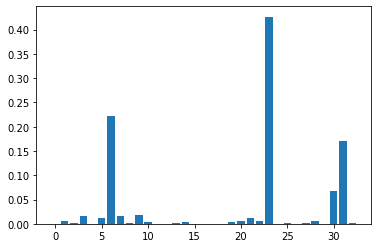

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split= 3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

import matplotlib.pyplot as plt
# get importance
importance = clf_en.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
fplt.show()

Features with biggest importance are:order0,	order3,	time_as_float,	CanadaToronto,	France/Paris. We will only include them in our model:

In [145]:
X = X.iloc[:, [6, 9, 23, 30, 31]]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)


### Now we can train our model with established parameters and specific features:

In [149]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split= 3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)


In [150]:
from sklearn.metrics import f1_score
print('Model f1 score with criterion gini: {0:0.4f}'. format(f1_score(y_test, y_pred_en)))


Model f1 score with criterion gini: 0.9755


F1 score doesn't care about how many true negatives are being classified. When working on an imbalanced dataset that demands attention on the negatives, Balanced Accuracy does better than F1.:

In [151]:
from sklearn.metrics import balanced_accuracy_score
print('Model balanced accuracy: {0:0.4f}'. format(balanced_accuracy_score(y_test,y_pred_en)))


Model balanced accuracy: 0.9811


In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[405  13]
 [  2 299]]


Compare the train-set and test-set accuracy

In [153]:
y_pred_train_en = clf_en.predict(X_train)

print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, y_pred_train_en)))

Training-set f1 score: 0.9844


Here, the training-set accuracy score is 0.98 while the test-set accuracy to be 0.97. These two values are quite comparable. So, there is no sign of overfitting. Created model has balanced accuracy equal to 0.98 which is very good.

### Model implementation using XGBoost,
- method usually outperforms other algorithm methods and it uses more accurate approximations to find the best tree model.

In [71]:
from sklearn.model_selection import GridSearchCV
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='f1', verbose=True)

In [72]:
grid_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=180, nthread=4,
              seed=42)

In [154]:
from sklearn import metrics
import xgboost as xgb
m1 = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=180, nthread=4,
              seed=42)
m1.fit(X_train, y_train)

expected_y  = y_test
predicted_y = m1.predict(X_test)

print(metrics.confusion_matrix(expected_y, predicted_y))
print('Model f1 score: {0:0.4f}'. format(f1_score(y_test, predicted_y)))
print('Model balanced accuracy: {0:0.4f}'. format(balanced_accuracy_score(y_test,predicted_y)))

[[408  10]
 [  2 299]]
Model f1 score: 0.9803
Model balanced accuracy: 0.9847
